In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv("../data_synthesize/out/correlated_attribute_mode/sythetic_data.csv")#.drop(columns = ['Unnamed: 19']).dropna(axis = 0)

In [3]:
df.head(10)

,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
0,1,65.0,149.0,63.951013,29.478724,1,140.0,89.0,64.0,0,0,5.499822,19.031053,32.551845,6.121806,47.797332,0.901255,2.982814,0
1,1,57.0,161.0,55.715067,21.694557,0,111.0,78.0,59.0,0,0,5.643927,21.163366,16.708498,2.499741,44.104020,3.157071,5.965247,1
2,1,67.0,161.0,60.308509,23.467612,1,146.0,102.0,67.0,0,0,6.259391,19.835336,6.522866,5.618516,63.256774,1.468975,6.030032,0
3,1,70.0,166.0,67.464110,24.187082,0,125.0,72.0,69.0,0,0,5.521559,20.184476,30.986751,3.890278,62.132465,3.928479,7.918538,0
4,1,56.0,155.0,42.243731,18.654700,0,118.0,81.0,70.0,0,0,5.503557,22.262742,22.232445,5.356250,62.132434,0.757572,3.138570,0
5,1,48.0,158.0,58.369142,22.256165,0,121.0,72.0,70.0,0,0,7.100525,24.263058,13.707423,8.899951,63.644374,1.814799,7.774579,1
6,1,57.0,158.0,65.402264,25.583842,1,128.0,77.0,70.0,0,0,5.429353,26.315291,23.671781,3.929249,63.338617,1.903060,4.113800,0
7,0,59.0,173.0,68.620280,23.724977,1,129.0,77.0,67.0,0,0,4.047609,33.022941,18.251872,7.143143,75.194902,0.385320,5.542411,0
8,1,74.0,167.0,72.512486,25.279576,1,135.0,82.0,77.0,0,0,6.058763,38.161379,40.253763,7.310181,70.998680,2.944244,4.503227,0
9,0,71.0,171.0,66.586075,22.753360,1,139.0,81.0,57.0,1,1,6.008308,17.198182,12.951826,7.444349,64.068806,0.688522,5.880280,0


In [4]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension', 'SBP',
       'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr', 'TG',
       'TC', 'Outcome'],
      dtype='object')

In [5]:
df.describe()

,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.647000,66.267000,163.142000,63.889546,23.966947,0.667000,140.969000,83.97400,68.27800,0.02900,0.024000,6.137905,21.962807,20.956766,5.866370,67.161813,1.639098,5.394816,0.283000
std,0.478142,9.959362,7.203313,9.748556,2.971406,0.471522,16.172062,9.78668,9.60828,0.16789,0.153126,1.799260,12.371221,16.473111,3.289803,35.143806,1.110301,4.431471,0.450682
min,0.000000,21.000000,145.000000,38.000483,13.626632,0.000000,100.000000,63.00000,22.00000,0.00000,0.000000,2.597801,1.548883,4.320222,0.580674,6.207399,0.335492,1.929320,0.000000
25%,0.000000,61.000000,158.000000,58.241809,22.116708,0.000000,130.000000,77.00000,62.00000,0.00000,0.000000,5.167286,15.477741,10.933378,4.402777,50.258419,0.948662,3.659042,0.000000
50%,1.000000,67.000000,162.000000,62.930706,23.768851,1.000000,138.000000,83.00000,68.00000,0.00000,0.000000,5.753987,20.497320,18.710273,5.416744,61.143417,1.351877,5.346205,0.000000
75%,1.000000,72.000000,168.000000,69.271900,25.709091,1.000000,152.000000,90.00000,75.00000,0.00000,0.000000,6.453609,25.410862,26.529107,6.642444,73.459030,1.954065,6.865768,1.000000
max,1.000000,91.000000,185.000000,109.570116,34.610337,1.000000,189.000000,135.00000,101.00000,1.00000,1.000000,18.591457,171.417368,257.092356,60.173149,674.955256,7.621788,131.366746,1.000000


In [6]:
#data = df.drop(columns = ['Unnamed: 19']).astype('float').values
data =df.values

In [7]:
data.shape

(1000, 19)

TC
kurtosis = 651.36156, transform_lambda = 0.02695, transformed_kurtosis= 3.20672
TG
kurtosis = 6.39116, transform_lambda = 0.00331, transformed_kurtosis= -0.01228
Scr
kurtosis = 177.08954, transform_lambda = -0.06684, transformed_kurtosis= 8.65833
BUN
kurtosis = 145.43208, transform_lambda = 0.25915, transformed_kurtosis= 8.31768
ALT
kurtosis = 66.37848, transform_lambda = 0.02885, transformed_kurtosis= 0.22401
AST
kurtosis = 68.93225, transform_lambda = 0.08055, transformed_kurtosis= 5.60707
FPG
kurtosis = 12.44533, transform_lambda = -1.09219, transformed_kurtosis= 2.71663
DBP
kurtosis = 2.13387, transform_lambda = -1.32449, transformed_kurtosis= -0.34798
SBP
kurtosis = -0.15300, transform_lambda = -0.91531, transformed_kurtosis= -0.15946


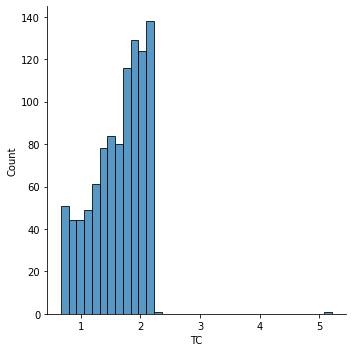

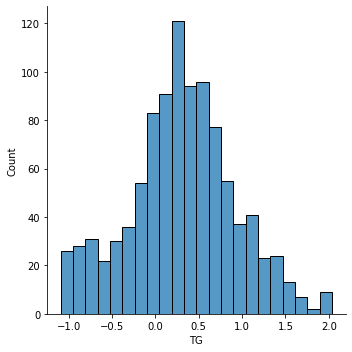

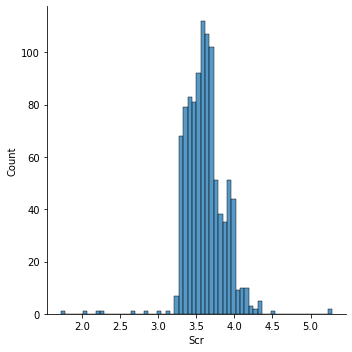

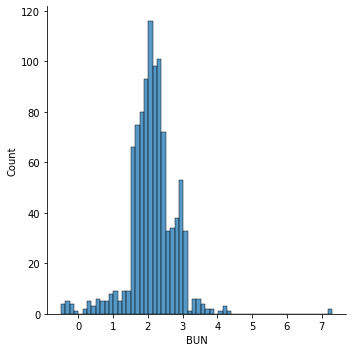

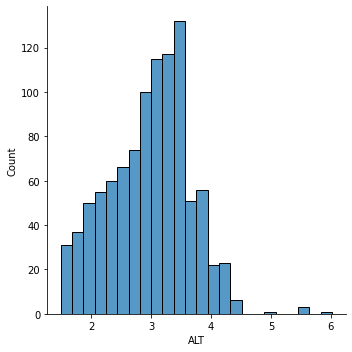

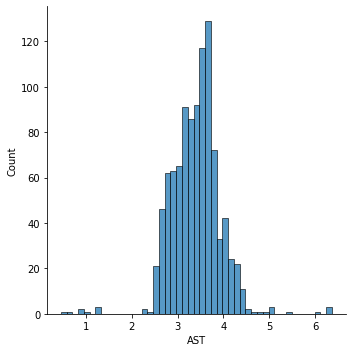

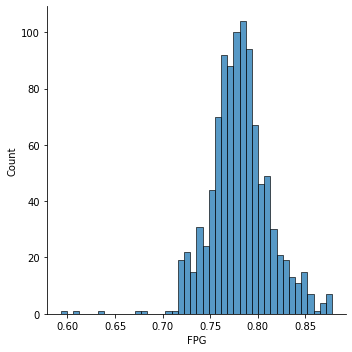

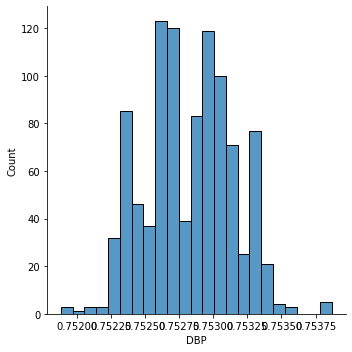

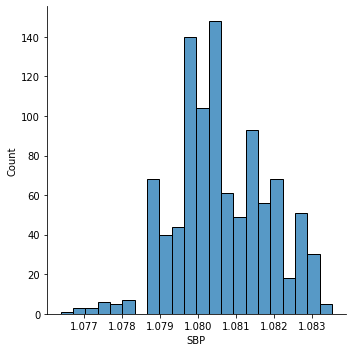

In [8]:
from scipy.optimize import minimize_scalar
xtotrans = ['TC', 'TG', 'Scr', 'BUN', 'ALT', 'AST', 'FPG', 'DBP', 'SBP']
for x in xtotrans:
    print(x)
    xt, namda = st.boxcox(x = df[x], optimizer=minimize_scalar)
    #print(res)
    
    print("kurtosis = %.5f, transform_lambda = %.5f, transformed_kurtosis= %.5f" %( st.kurtosis(df[x]), namda, st.kurtosis(xt)))
    df[x] = xt
    sns.displot(df[x])

In [9]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier

Y = df["Outcome"].values
X = df[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']].values
names = ['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']
sc = 'f1_macro'

In [10]:
X.shape

(1000, 18)

In [11]:
X

array([[ 1.00000000e+00,  6.50000000e+01,  1.49000000e+02, ...,
         3.40764568e+00, -1.03949533e-01,  1.10912101e+00],
       [ 1.00000000e+00,  5.70000000e+01,  1.61000000e+02, ...,
         3.34537598e+00,  1.15183491e+00,  1.82963051e+00],
       [ 1.00000000e+00,  6.70000000e+01,  1.61000000e+02, ...,
         3.62203758e+00,  3.84809674e-01,  1.84096656e+00],
       ...,
       [ 0.00000000e+00,  8.70000000e+01,  1.59000000e+02, ...,
         3.86808004e+00, -3.95569873e-01,  1.28695297e+00],
       [ 0.00000000e+00,  5.80000000e+01,  1.76000000e+02, ...,
         3.73903003e+00,  2.04695225e-01,  2.03774960e+00],
       [ 1.00000000e+00,  7.10000000e+01,  1.58000000e+02, ...,
         3.65958311e+00,  8.08714748e-01,  1.16900333e+00]])

In [12]:
Y.shape

(1000,)

In [13]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()
score = cross_val_score(classifier_lr, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8)
print(score)
print(sum(score)/len(score))

/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[0.67  0.72  0.76  0.74  0.705 0.715 0.675 0.75  0.77  0.705]
0.7210000000000001


/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

In [14]:
#n_estimators为森林中树木数量，max_depth树的最大深度
#进行交叉验证，训练集和测试集为7:3的比例进行分配，
#ShuffleSplit()函数用于随机抽样（数据集总数，迭代次数，test所占比例）
classifier_rf = RandomForestClassifier(n_estimators=20, 
                            max_depth= 19, 
                            max_features= 6, 
                            min_samples_leaf=1, 
                            min_samples_split=5, 
                            bootstrap=False)

score = cross_val_score(classifier_rf, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8)
print(score)
print(sum(score)/len(score))


[0.885 0.91  0.845 0.85  0.85  0.92  0.86  0.855 0.875 0.94 ]
0.8789999999999999


In [15]:

from sklearn.ensemble import GradientBoostingClassifier
classifier_gbdt = GradientBoostingClassifier(n_estimators=25, 
                                max_depth= 19,
                                 max_features= 9, 
                                 min_samples_leaf=1, 
                                 min_samples_split=5)

score = cross_val_score(classifier_gbdt, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8)
print(score)
print(sum(score)/len(score))

[0.875 0.895 0.945 0.915 0.925 0.855 0.885 0.91  0.905 0.9  ]
0.901


In [16]:
from sklearn.svm import SVC
classifier_svc = SVC(C= 100, kernel = 'linear', gamma=1)
#classifier_svc = SVC(C= 1000, gamma=0.0001, kernel = 'rbf')
#classifier_svc = SVC(C= 10, kernel = 'rbf', gamma=0.01)

score = cross_val_score(classifier_svc, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8)
print(score)
print(sum(score)/len(score))

[0.835 0.805 0.865 0.83  0.81  0.8   0.825 0.85  0.815 0.87 ]
0.8304999999999998


In [17]:
from xgboost import XGBClassifier
from xgboost import plot_importance

#rf = XGBClassifier(learning_rate=0.01,
#                      n_estimators=10,           # 树的个数-10棵树建立xgboost
#                      max_depth=4,               # 树的深度
#                      min_child_weight = 1,      # 叶子节点最小权重
#                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
#                      subsample=1,               # 所有样本建立决策树
#                      colsample_btree=1,         # 所有特征建立决策树
#                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
#                      random_state=27,           # 随机数
#                      slient = 0)

classifier_xgb = XGBClassifier(n_estimators=60, max_depth= 8, learning_rate= 0.1)
#rf = XGBClassifier(learning_rate= 0.01, max_depth= 7,  n_estimators= 25)

score = cross_val_score(classifier_xgb, X, Y, cv=ShuffleSplit(10, test_size = .2, train_size = .8), n_jobs = 8)
print(score)
print(sum(score)/len(score))

[0.865 0.855 0.915 0.83  0.88  0.88  0.865 0.89  0.88  0.895]
0.8755


/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

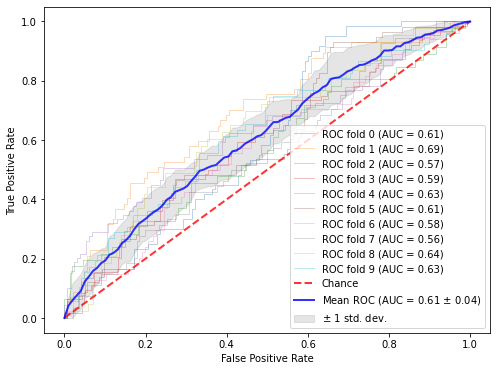

In [18]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
classifier = classifier_lr

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
                 
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

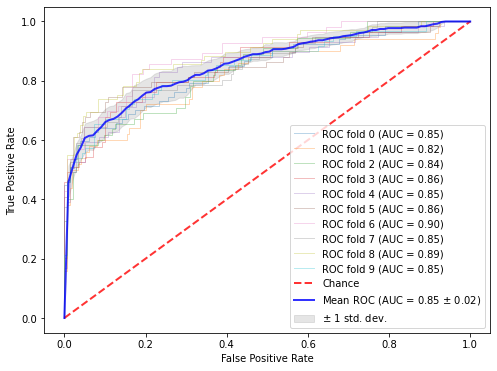

In [19]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
#classifier = SVC(C= 20, kernel = 'linear')
classifier = classifier_svc


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
                 
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

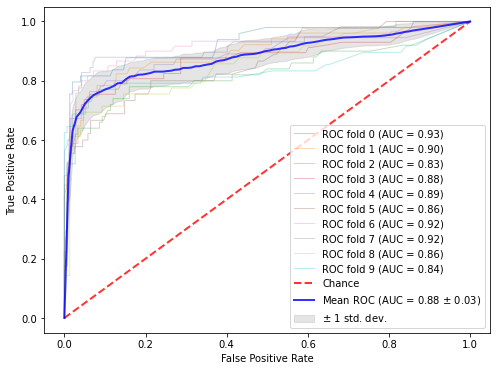

In [20]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
#classifier = RandomForestClassifier(n_estimators=35, max_depth= 5, max_features= 4)
classifier = classifier_rf

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

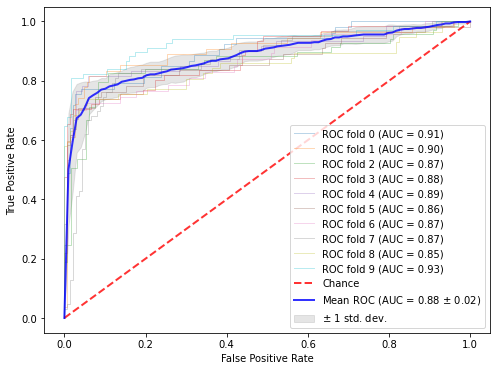

In [21]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
#classifier = GradientBoostingClassifier(n_estimators=45, max_depth= 4, max_features= 3)
classifier = classifier_gbdt

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

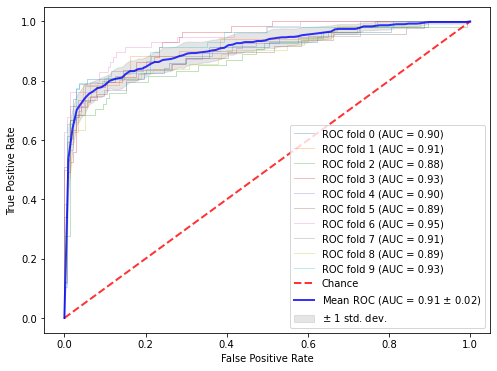

In [22]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .2, train_size = .8)
#classifier = XGBClassifier(n_estimators=35, max_depth= 5, learning_rate= 0.01)
classifier = classifier_xgb

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()